# Station Map Visualization

In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from selenium import webdriver
from PIL import Image
import time
from IPython.display import display
from io import StringIO

folder_path = r"D:\Documents\Term 8\Deep Learning\Lightning_Risk_Prediction\data"

In [2]:
stations_df = pd.read_csv(os.path.join(folder_path,'station_df.csv'),index_col="id")

In [3]:
stations_df.head()

,deviceId,name,latitude,longitude
id,,,,
S77,S77,Alexandra Road,1.2937,103.8125
S109,S109,Ang Mo Kio Avenue 5,1.3764,103.8492
S117,S117,Banyan Road,1.2560,103.6790
S90,S90,Bukit Timah Road,1.3191,103.8191
S61,S61,Chai Chee Street,1.3230,103.9217


In [5]:
#Data Cleaning Results
class_dict = {1: ['S07', 'S08', 'S11', 'S112', 'S113', 'S114', 'S118', 'S119', 'S120', 'S123', 'S215', 'S29', 'S33', 'S35', 'S36', 'S40', 'S46', 'S61', 'S66', 'S69', 'S71', 'S77', 'S78', 'S79', 'S81', 'S82', 'S84', 'S88', 'S89', 'S90', 'S900', 'S91', 'S92', 'S94', 'S201', 'S202', 'S203', 'S204', 'S205', 'S207', 'S208', 'S209', 'S210', 'S211', 'S212', 'S213', 'S214', 'S216', 'S217', 'S218', 'S219', 'S220', 'S221', 'S222', 'S223', 'S224', 'S226', 'S227', 'S228', 'S229', 'S230', 'S64'], 5: ['S100', 'S104', 'S106', 'S107', 'S108', 'S109', 'S111', 'S115', 'S116', 'S117', 'S121', 'S122', 'S24', 'S43', 'S44', 'S50', 'S60', 'S102', 'S06']}

chosen = ['S104', 'S107', 'S109', 'S115', 'S116', 'S43', 'S50']

In [21]:
import folium
import os
from branca.element import Template, MacroElement

# Define color mapping for each class
class_color_map = {
    1: 'lightred',
    5: 'lightgreen'
}

# Special styling for chosen stations
chosen_color = 'darkgreen'
chosen_icon = 'star'

# Reverse class_dict: map station ID to class
station_to_class = {}
for cls, station_list in class_dict.items():
    for station in station_list:
        station_to_class[station] = cls

# Create the map centered on Singapore
map_center = [1.3521, 103.8198]
map = folium.Map(location=map_center, zoom_start=12)

# Add markers to map
for _, row in stations_df.iterrows():
    station_id = str(row["deviceId"])
    name = station_id + ": " + str(row["name"])
    lat = row["latitude"]
    lon = row["longitude"]

    # Determine icon styling
    if station_id in chosen:
        color = chosen_color
        icon = chosen_icon
    else:
        cls = station_to_class.get(station_id, None)
        color = class_color_map.get(cls, 'gray')
        icon = 'cloud'

    # Add the marker
    folium.Marker(
        location=[lat, lon],
        popup=f"{station_id}: {name}",
        icon=folium.Icon(color=color, icon=icon)
    ).add_to(map)

# Highlighted extra marker at specific coordinates
highlight_location = [1.3413, 103.9245]

# Add red marker with a dot icon (using 'record' from glyphicon set)
folium.Marker(
    location=highlight_location,
    popup="Highlighted Location (1.3413, 103.9245)",
    icon=folium.Icon(color='red', icon='record', prefix='glyphicon')
).add_to(map)

# Add a circle around it for emphasis
folium.Circle(
    location=highlight_location,
    radius=300,  # in meters
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.25
).add_to(map)


# Add a legend
legend_html = """
{% macro html() %}
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 200px; height: auto; 
    z-index:9999; font-size:14px;
    background-color:white;
    padding: 10px;
    border:2px solid grey;
    border-radius:5px;
    box-shadow: 3px 3px 6px rgba(0,0,0,0.3);
">
    <b>Station Classes</b><br>
    <i class="fa fa-map-marker fa-2x" style="color:lightcoral"></i>&nbsp; Low Data Occurence<br>
    <i class="fa fa-map-marker fa-2x" style="color:lightgreen"></i>&nbsp; High Data Occurence<br>
    <i class="fa fa-star fa-2x" style="color:green"></i>&nbsp; Chosen<br>
    <i class="fa fa-map-marker fa-2x" style="color:gray"></i>&nbsp; Unclassified<br>
</div>
{% endmacro %}
"""

legend = MacroElement()
legend._template = Template(legend_html)

# Patch render to call the macro without arguments
def fixed_render(self, **kwargs):
    macro = self._template.module.html
    html = macro()
    self._parent.html.add_child(folium.Element(html), name=self.get_name())

legend.render = fixed_render.__get__(legend, MacroElement)
map.get_root().add_child(legend)

# Save the map
map.save(os.path.join(folder_path, "weather_stations_map.html"))
print("Map has been saved as 'data/weather_stations_map.html'.")


Map has been saved as 'data/weather_stations_map.html'.


In [19]:
# Set up Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run Chrome in the background
options.add_argument("--window-size=800x600")  # Adjust to fit the map

# Path to ChromeDriver (update path if needed)
driver = webdriver.Chrome(options=options)
driver.get("file://" + r"D:/Documents/Term%208/Deep%20Learning/Lightning_Risk_Prediction/data/weather_stations_map.html")

# Wait for the map to render
time.sleep(2)  # Adjust if needed

# Save screenshot
screenshot_path = os.path.join(folder_path,"weather_stations_map.png")
driver.save_screenshot(screenshot_path)

# Close Selenium
driver.quit()

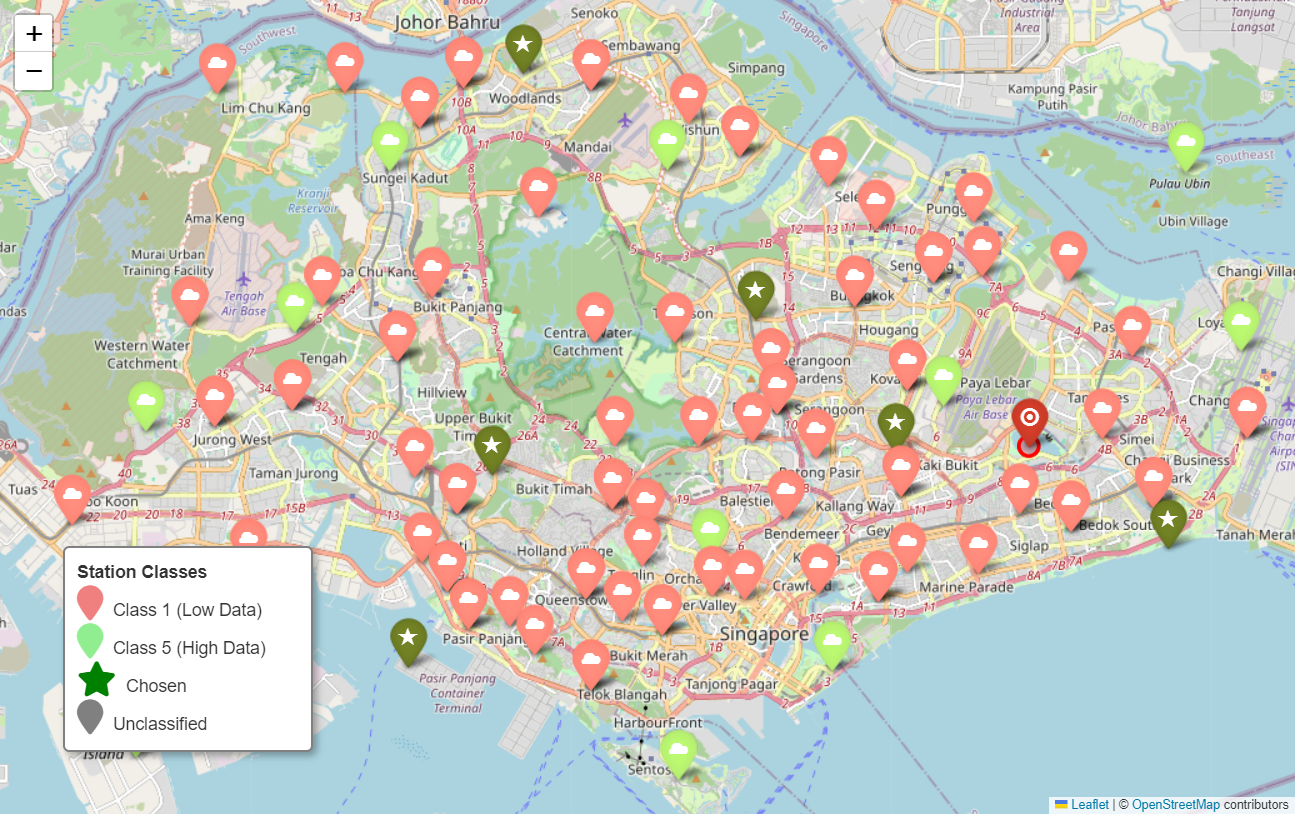

In [20]:
img = Image.open(screenshot_path)
display(img)

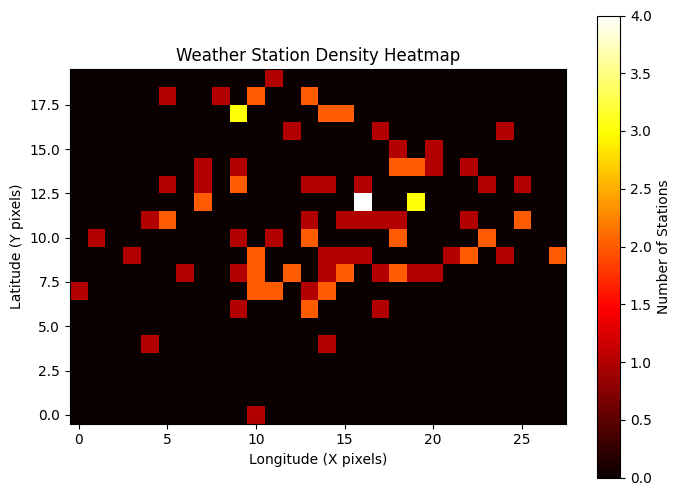

In [16]:
# Convert to DataFrame
df = stations_df

# Define image size
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 20

# Get coordinate bounds
min_lat, max_lat = df["latitude"].min(), df["latitude"].max()
min_lon, max_lon = df["longitude"].min(), df["longitude"].max()

# Compute step sizes per pixel
lat_step = (max_lat - min_lat) / (IMAGE_HEIGHT - 1)
lon_step = (max_lon - min_lon) / (IMAGE_WIDTH - 1)

# Function to map coordinates to pixel indices
def map_to_pixel(lat, lon):
    x_pixel = int((lon - min_lon) / lon_step)
    y_pixel = int((lat - min_lat) / lat_step)

    # Ensure within valid bounds
    x_pixel = min(max(x_pixel, 0), IMAGE_WIDTH - 1)
    y_pixel = min(max(y_pixel, 0), IMAGE_HEIGHT - 1)

    return y_pixel, x_pixel  # (row, column) order for heatmap

# Create grid to count station density
heatmap = np.zeros((IMAGE_HEIGHT, IMAGE_WIDTH), dtype=int)

# Map each station to a pixel and count occurrences
pixel_coords = []
for _, row in df.iterrows():
    y, x = map_to_pixel(row["latitude"], row["longitude"])
    heatmap[y, x] += 1  # Increment count in that pixel
    pixel_coords.append((y, x, row["name"]))

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap="hot", interpolation="nearest")
plt.colorbar(label="Number of Stations")
plt.title("Weather Station Density Heatmap")
plt.xlabel("Longitude (X pixels)")
plt.ylabel("Latitude (Y pixels)")
plt.gca().invert_yaxis()  # Invert Y-axis for correct geographic orientation
plt.show()

In [17]:
chosen_stations = ['S104', 'S107', 'S109', 'S115', 'S116', 'S24', 'S43', 'S50']

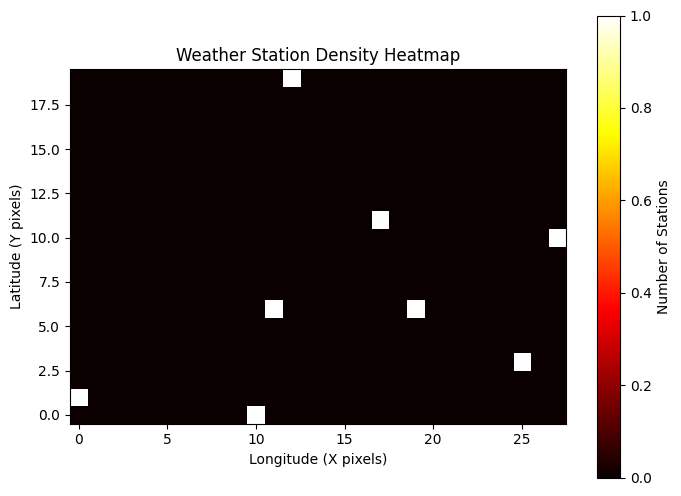

In [18]:
chosen_stations = ['S104', 'S107', 'S109', 'S115', 'S116', 'S24', 'S43', 'S50']

df = stations_df.loc[stations_df.index.isin(chosen_stations)]


# Define image size
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 20

# Get coordinate bounds
min_lat, max_lat = df["latitude"].min(), df["latitude"].max()
min_lon, max_lon = df["longitude"].min(), df["longitude"].max()

# Compute step sizes per pixel
lat_step = (max_lat - min_lat) / (IMAGE_HEIGHT - 1)
lon_step = (max_lon - min_lon) / (IMAGE_WIDTH - 1)

# Function to map coordinates to pixel indices
def map_to_pixel(lat, lon):
    x_pixel = int((lon - min_lon) / lon_step)
    y_pixel = int((lat - min_lat) / lat_step)

    # Ensure within valid bounds
    x_pixel = min(max(x_pixel, 0), IMAGE_WIDTH - 1)
    y_pixel = min(max(y_pixel, 0), IMAGE_HEIGHT - 1)

    return y_pixel, x_pixel  # (row, column) order for heatmap

# Create grid to count station density
heatmap = np.zeros((IMAGE_HEIGHT, IMAGE_WIDTH), dtype=int)

# Map each station to a pixel and count occurrences
pixel_coords = []
for _, row in df.iterrows():
    y, x = map_to_pixel(row["latitude"], row["longitude"])
    heatmap[y, x] += 1  # Increment count in that pixel
    pixel_coords.append((y, x, row["name"]))

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap="hot", interpolation="nearest")
plt.colorbar(label="Number of Stations")
plt.title("Weather Station Density Heatmap")
plt.xlabel("Longitude (X pixels)")
plt.ylabel("Latitude (Y pixels)")
plt.gca().invert_yaxis()  # Invert Y-axis for correct geographic orientation
plt.show()

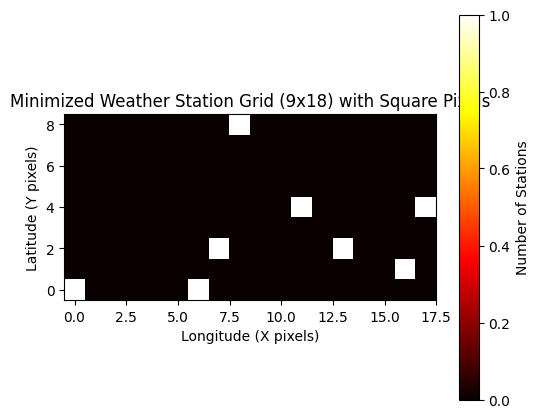

In [22]:
import numpy as np
import matplotlib.pyplot as plt

df = stations_df.loc[stations_df.index.isin(chosen_stations)]

# Get coordinate bounds
min_lat, max_lat = df["latitude"].min(), df["latitude"].max()
min_lon, max_lon = df["longitude"].min(), df["longitude"].max()

lat_range = max_lat - min_lat
lon_range = max_lon - min_lon

# Start with a small square pixel size and increase until all stations map to unique pixels
num_stations = len(df)
pixel_size = min(lat_range, lon_range) / num_stations  # initial guess
unique_pixels = set()

while True:
    unique_pixels.clear()
    for _, row in df.iterrows():
        x = int((row["longitude"] - min_lon) / pixel_size)
        y = int((row["latitude"] - min_lat) / pixel_size)
        unique_pixels.add((y, x))
    
    if len(unique_pixels) >= num_stations:
        break
    pixel_size *= 0.9  # Try smaller pixel size until we reach the required uniqueness

# Now determine final grid size
max_y = max(p[0] for p in unique_pixels) + 1
max_x = max(p[1] for p in unique_pixels) + 1
heatmap = np.zeros((max_y, max_x), dtype=int)

# Map each station to its pixel
pixel_coords = []
for _, row in df.iterrows():
    x = int((row["longitude"] - min_lon) / pixel_size)
    y = int((row["latitude"] - min_lat) / pixel_size)
    x = min(max(x, 0), max_x - 1)
    y = min(max(y, 0), max_y - 1)
    heatmap[y, x] += 1
    pixel_coords.append((y, x, row["deviceId"]))

# Plot
plt.figure(figsize=(6, 5))
plt.imshow(heatmap, cmap="hot", interpolation="nearest")
plt.colorbar(label="Number of Stations")
plt.title(f"Minimized Weather Station Grid ({max_y}x{max_x}) with Square Pixels")
plt.xlabel("Longitude (X pixels)")
plt.ylabel("Latitude (Y pixels)")
plt.gca().invert_yaxis()
plt.show()


In [23]:
pixel_coords

[(4, 11, 'S109'),
 (2, 7, 'S50'),
 (1, 16, 'S107'),
 (2, 13, 'S43'),
 (0, 0, 'S115'),
 (4, 17, 'S24'),
 (0, 6, 'S116'),
 (8, 8, 'S104')]

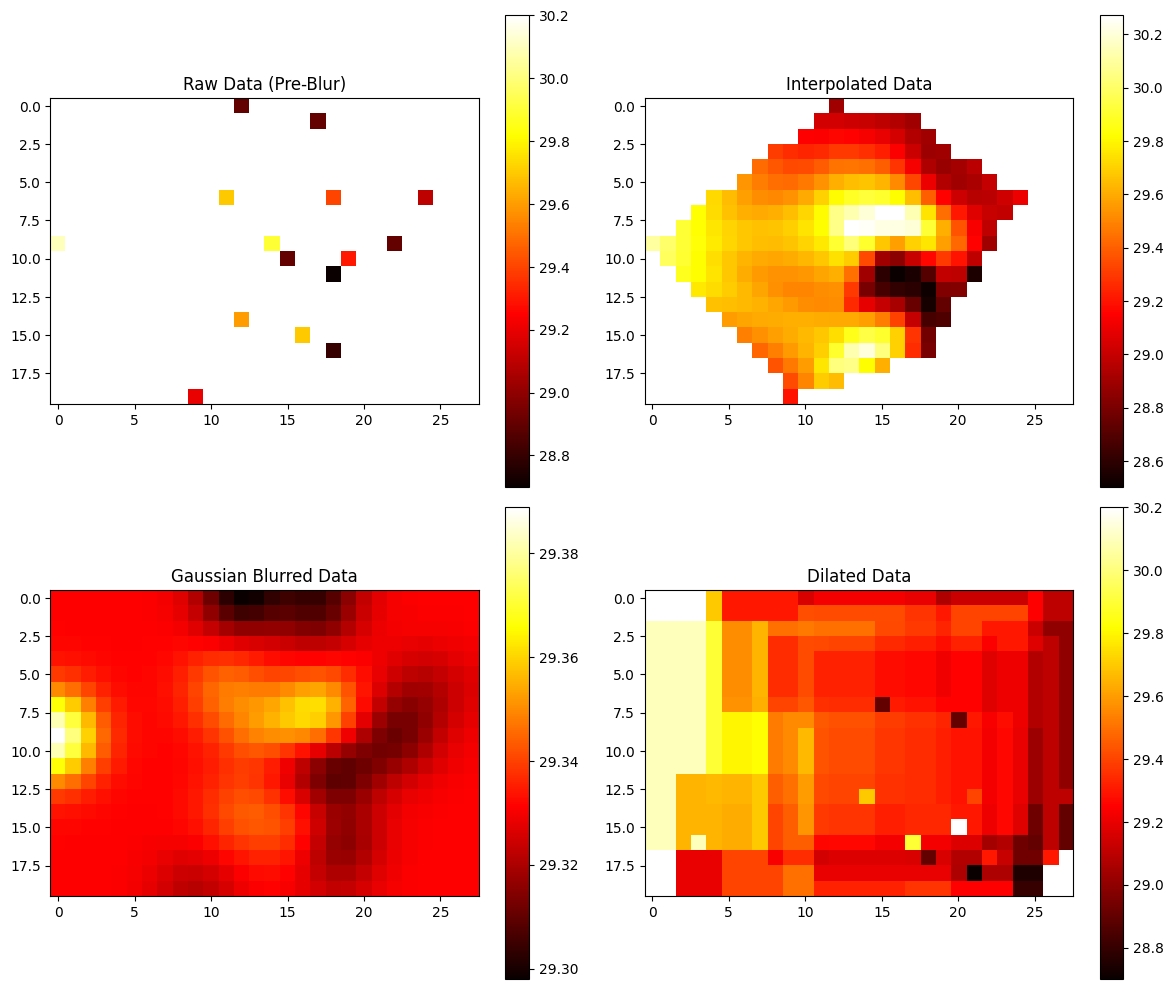

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, binary_dilation, generic_filter
from scipy.interpolate import griddata

# Define station data (Coordinates + IDs)
stations = {
    "S06": (1.36491, 103.75065),
    "S100": (1.37999, 103.87643),
    "S102": (1.36019, 103.85335),
    "S104": (1.35041, 103.85526),
    "S106": (1.29911, 103.88289),
    "S107": (1.32785, 103.88899),
    "S108": (1.32427, 103.8097),
    "S109": (1.4044, 103.78962),
    "S111": (1.3437, 103.9444),
    "S115": (1.34583, 103.68166),
    "S116": (1.3427, 103.8482),
    "S117": (1.3399, 103.8878),
    "S121": (1.3524, 103.9007),
    "S122": (1.35691, 103.89088),
    "S24": (1.28987, 103.82364),
    "S43": (1.3701, 103.8271),
    "S44": (1.38666, 103.89797),
    "S50": (1.32485, 103.95836),
    "S60": (1.3136, 104.00317),
}

# Temperature readings
data = {
    "S06": np.nan,  # Missing value
    "S100": 29.7,
    "S102": np.nan,  # Missing value
    "S104": 28.9,
    "S106": 28.9,
    "S107": 29.4,
    "S108": 29.7,
    "S109": 29.2,
    "S111": 28.9,
    "S115": 30.1,
    "S116": 29.9,
    "S117": 30.2,
    "S121": 29.3,
    "S122": 28.7,
    "S24": 28.9,
    "S43": 29.6,
    "S44": 28.8,
    "S50": 29.1,
    "S60": np.nan,  # Missing value
}

# Define image grid size
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 20

# Get coordinate bounds
min_lat, max_lat = min(lat for lat, _ in stations.values()), max(lat for lat, _ in stations.values())
min_lon, max_lon = min(lon for _, lon in stations.values()), max(lon for _, lon in stations.values())

lat_step = (max_lat - min_lat) / IMAGE_HEIGHT
lon_step = (max_lon - min_lon) / IMAGE_WIDTH

# Function to map lat/lon to pixel coordinates
def map_to_pixel(lat, lon):
    x = int((lon - min_lon) / lon_step)
    y = int((lat - min_lat) / lat_step)
    return min(y, IMAGE_HEIGHT - 1), min(x, IMAGE_WIDTH - 1)

# Create an empty grid
grid = np.full((IMAGE_HEIGHT, IMAGE_WIDTH), np.nan)

# Populate grid with station temperatures
points, values = [], []
for station, temp in data.items():
    if station in stations and not np.isnan(temp):
        y, x = map_to_pixel(*stations[station])
        grid[y, x] = temp
        points.append((y, x))
        values.append(temp)

# Plot raw grid
raw_grid = grid.copy()

def gaussian():
    # Create an empty grid
    grid = np.full((IMAGE_HEIGHT, IMAGE_WIDTH), np.nan)

    # Populate grid with station temperatures
    for station, temp in data.items():
        if station in stations:
            y, x = map_to_pixel(*stations[station])
            grid[y, x] = temp

    # Fill missing values (interpolation)
    nan_mask = np.isnan(grid)
    grid[nan_mask] = np.nanmean(grid)  # Simple mean filling, can be improved

    # Apply Gaussian Blur
    sigma = 2  # Adjust for smoother effect
    smoothed_grid = gaussian_filter(grid, sigma=sigma)
    
    return smoothed_grid

def dilated():
    # Create an empty grid
    grid = np.full((IMAGE_HEIGHT, IMAGE_WIDTH), np.nan)

    # Populate grid with station temperatures
    points, values = [], []
    for station, temp in data.items():
        if station in stations and not np.isnan(temp):
            y, x = map_to_pixel(*stations[station])
            grid[y, x] = temp
            points.append((y, x))
            values.append(temp)

    # Function to replace NaNs with neighborhood mean
    def replace_nan_with_mean(arr):
        if np.isnan(arr[4]):  # Center pixel
            non_nan_values = arr[~np.isnan(arr)]
            return np.mean(non_nan_values) if non_nan_values.size > 0 else np.nan
        return arr[4]  # Keep existing value if not NaN

    # Apply mean filter to fill missing values in dilated regions
    dilated_grid_filled = generic_filter(grid, replace_nan_with_mean, size=15, mode="constant", cval=np.nan)

    return dilated_grid_filled


# Perform Interpolation
xx, yy = np.meshgrid(range(IMAGE_WIDTH), range(IMAGE_HEIGHT))
interpolated_grid = griddata(points, values, (yy, xx), method="cubic")

# Plot results in a 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Raw data
ax1 = axes[0, 0]
c1 = ax1.imshow(raw_grid, cmap="hot", interpolation="nearest")
ax1.set_title("Raw Data (Pre-Blur)")
fig.colorbar(c1, ax=ax1)

# Interpolated data
ax2 = axes[0, 1]
c2 = ax2.imshow(interpolated_grid, cmap="hot", interpolation="nearest")
ax2.set_title("Interpolated Data")
fig.colorbar(c2, ax=ax2)

# Blurred data
ax3 = axes[1, 0]
c3 = ax3.imshow(gaussian(), cmap="hot", interpolation="nearest")
ax3.set_title("Gaussian Blurred Data")
fig.colorbar(c3, ax=ax3)

# Dilated data
ax4 = axes[1, 1]
c4 = ax4.imshow(dilated(), cmap="hot", interpolation="nearest")
ax4.set_title("Dilated Data")
fig.colorbar(c4, ax=ax4)

plt.tight_layout()
plt.show()
